In [5]:
import os
checkpoint_id = "4ed34bf8-f754-4019-b144-102478f8a711"
os.chdir(f"/home/christoph/Code/det-gan-research/checkpoints/{checkpoint_id}/code/")

In [59]:
import math
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


from determined.experimental import Checkpoint
from models import MsgGenerator
from msg_gan import MsgGANTrail
from utils import sample_noise, adjust_dynamic_range

In [53]:
trail = Checkpoint.load_from_path("../", map_location=torch.device('cpu'))
z = sample_noise(num_images, noise_size)

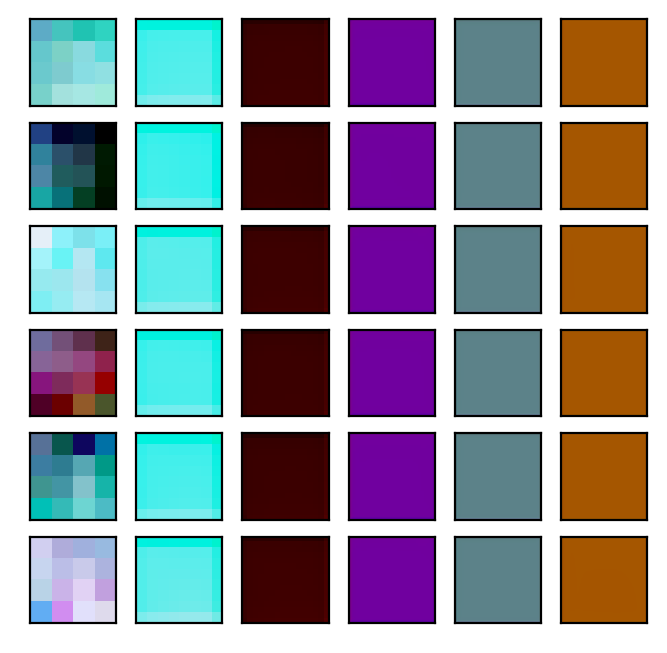

In [64]:
num_images = 6
noise_size = 256


biggest_size = imgs[-1].shape[-1]
num_resolutions = int(math.log2(biggest_size))

resolutions, x = trail.generator(z)
fig, axes = plt.subplots(nrows=num_images, ncols=num_resolutions - 1, dpi=200, figsize=(4, 4))


for col, resolution in enumerate(resolutions):
    for row, tensor in enumerate(resolution):
        tensor.clamp_(0, 1)
        # tensor = adjust_dynamic_range(tensor)
        #current_size = tensor.shape[-1]
        
        
        image = transforms.ToPILImage()(tensor.cpu())
        axes[row, col].imshow(image)
        axes[row, col].get_xaxis().set_visible(False)
        axes[row, col].get_yaxis().set_visible(False)